# Review Konsep Turunan

Turunan (derivative) adalah konsep fundamental dalam kalkulus yang memiliki banyak aplikasi dalam machine learning. Notebook ini akan membahas konsep turunan, aturan-aturan diferensiasi, dan aplikasinya dalam konteks machine learning.

## Definisi Turunan

Turunan dari suatu fungsi f(x) adalah fungsi lain f'(x) yang mengukur laju perubahan f(x) terhadap perubahan x. Secara formal, turunan didefinisikan sebagai:

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

Secara geometris, turunan di suatu titik adalah kemiringan (slope) garis singgung pada kurva f(x) di titik tersebut.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.animation import FuncAnimation

# Fungsi untuk menghitung turunan numerik
def numerical_derivative(f, x, h=1e-5):
    """
    Menghitung turunan numerik dengan pendekatan diferensial
    
    Parameters:
    f: fungsi yang akan diturunkan
    x: titik di mana turunan dihitung
    h: ukuran langkah (step size)
    
    Returns:
    turunan numerik dari f di x
    """
    return (f(x + h) - f(x)) / h

# Definisikan beberapa fungsi untuk contoh
def f1(x):
    return x**2

def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(x)

# Visualisasi intuisi turunan sebagai kemiringan
def visualize_derivative_intuition(f, x0, title):
    """Visualisasikan turunan sebagai kemiringan garis singgung"""
    x = np.linspace(x0 - 2, x0 + 2, 1000)
    y = f(x)
    
    # Hitung turunan numerik di x0
    derivative = numerical_derivative(f, x0)
    
    # Persamaan garis singgung: y = f(x0) + f'(x0)(x - x0)
    tangent_line = f(x0) + derivative * (x - x0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label=f'f(x)')
    plt.plot(x, tangent_line, 'r--', linewidth=2, label=f'Garis singgung di x={x0}')
    plt.plot(x0, f(x0), 'ro', markersize=8)
    plt.grid(True, alpha=0.3)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Visualisasi turunan fungsi f1(x) = x^2
visualize_derivative_intuition(f1, 1.5, "Turunan f(x) = x² di x = 1.5")

# Visualisasi turunan fungsi f2(x) = sin(x)
visualize_derivative_intuition(f2, np.pi/4, "Turunan f(x) = sin(x) di x = π/4")

# Visualisasi turunan sebagai limit
def visualize_derivative_as_limit(f, x0, title):
    """Visualisasikan turunan sebagai limit dari diferensial"""
    h_values = [1, 0.5, 0.1, 0.01, 0.001, 0.0001]
    approximations = []
    
    for h in h_values:
        approx = (f(x0 + h) - f(x0)) / h
        approximations.append(approx)
    
    # Turunan analitik (untuk perbandingan)
    derivative = numerical_derivative(f, x0, h=1e-10)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(h_values)), approximations, 'o-', linewidth=2, markersize=8)
    plt.axhline(y=derivative, color='r', linestyle='--', label='Nilai sebenarnya')
    plt.grid(True, alpha=0.3)
    plt.title(title)
    plt.xlabel('Iterasi')
    plt.xticks(range(len(h_values)), [str(h) for h in h_values])
    plt.ylabel('Aproksimasi Turunan')
    plt.legend()
    plt.show()
    
    print(f"Nilai h\t\tAproksimasi\t\tError")
    print("-" * 50)
    for h, approx in zip(h_values, approximations):
        error = abs(approx - derivative)
        print(f"{h}\t\t{approx:.10f}\t\t{error:.10f}")
    print(f"Nilai sebenarnya: {derivative:.10f}")

# Visualisasi turunan sebagai limit untuk f1(x) = x^2
visualize_derivative_as_limit(f1, 2, "Aproksimasi Turunan f(x) = x² di x = 2")

ModuleNotFoundError: No module named 'sympy'

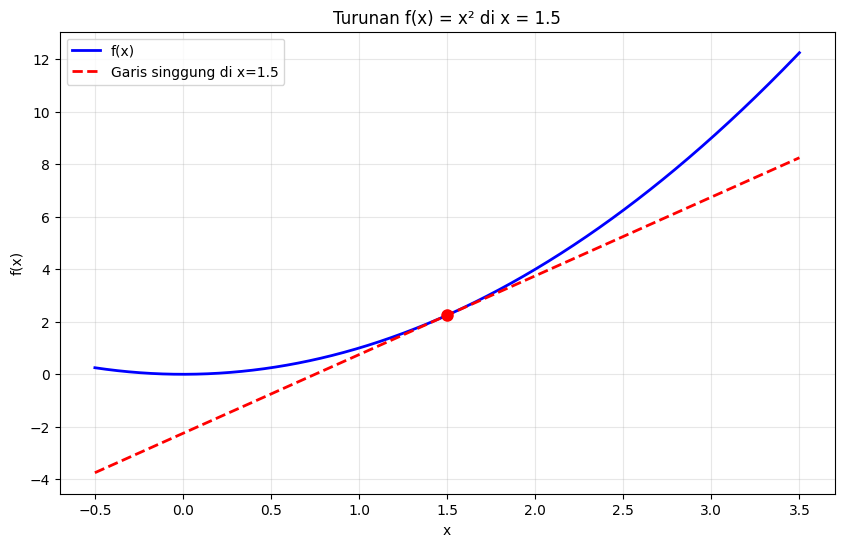

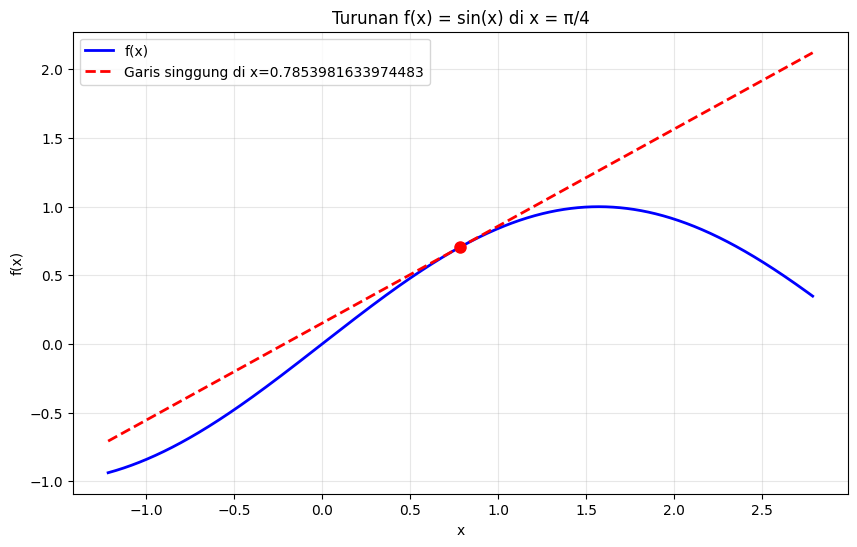

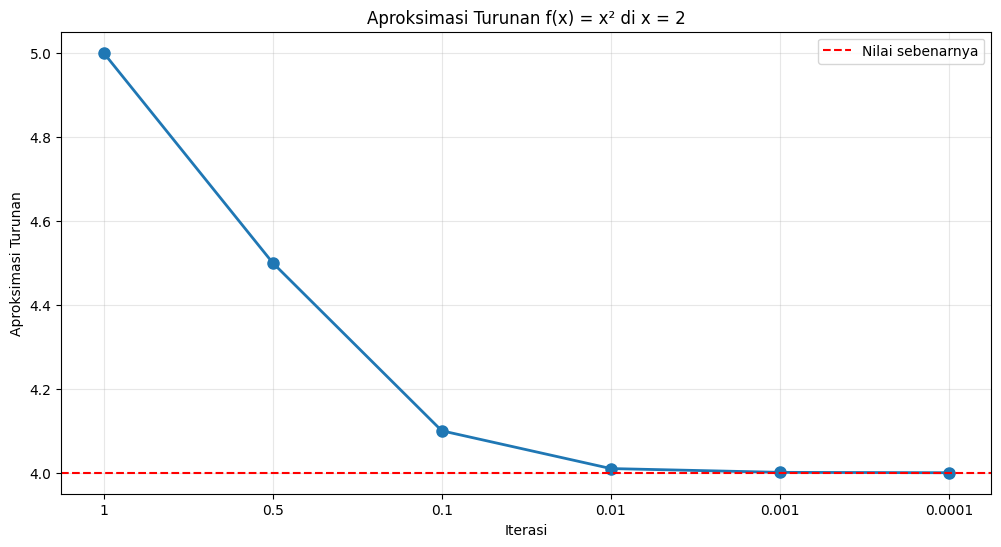

Nilai h		Aproksimasi		Error
--------------------------------------------------
1		5.0000000000		0.9999996690
0.5		4.5000000000		0.4999996690
0.1		4.1000000000		0.0999996690
0.01		4.0100000000		0.0099996690
0.001		4.0010000000		0.0009996690
0.0001		4.0001000000		0.0000996690
Nilai sebenarnya: 4.0000003310


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fungsi untuk menghitung turunan numerik
def numerical_derivative(f, x, h=1e-5):
    """
    Menghitung turunan numerik dengan pendekatan diferensial
    
    Parameters:
    f: fungsi yang akan diturunkan
    x: titik di mana turunan dihitung
    h: ukuran langkah (step size)
    
    Returns:
    turunan numerik dari f di x
    """
    return (f(x + h) - f(x)) / h

# Definisikan beberapa fungsi untuk contoh
def f1(x):
    return x**2

def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(x)

# Visualisasi intuisi turunan sebagai kemiringan
def visualize_derivative_intuition(f, x0, title):
    """Visualisasikan turunan sebagai kemiringan garis singgung"""
    x = np.linspace(x0 - 2, x0 + 2, 1000)
    y = f(x)
    
    # Hitung turunan numerik di x0
    derivative = numerical_derivative(f, x0)
    
    # Persamaan garis singgung: y = f(x0) + f'(x0)(x - x0)
    tangent_line = f(x0) + derivative * (x - x0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label=f'f(x)')
    plt.plot(x, tangent_line, 'r--', linewidth=2, label=f'Garis singgung di x={x0}')
    plt.plot(x0, f(x0), 'ro', markersize=8)
    plt.grid(True, alpha=0.3)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Visualisasi turunan fungsi f1(x) = x^2
visualize_derivative_intuition(f1, 1.5, "Turunan f(x) = x² di x = 1.5")

# Visualisasi turunan fungsi f2(x) = sin(x)
visualize_derivative_intuition(f2, np.pi/4, "Turunan f(x) = sin(x) di x = π/4")

# Visualisasi turunan sebagai limit
def visualize_derivative_as_limit(f, x0, title):
    """Visualisasikan turunan sebagai limit dari diferensial"""
    h_values = [1, 0.5, 0.1, 0.01, 0.001, 0.0001]
    approximations = []
    
    for h in h_values:
        approx = (f(x0 + h) - f(x0)) / h
        approximations.append(approx)
    
    # Turunan analitik (untuk perbandingan)
    derivative = numerical_derivative(f, x0, h=1e-10)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(h_values)), approximations, 'o-', linewidth=2, markersize=8)
    plt.axhline(y=derivative, color='r', linestyle='--', label='Nilai sebenarnya')
    plt.grid(True, alpha=0.3)
    plt.title(title)
    plt.xlabel('Iterasi')
    plt.xticks(range(len(h_values)), [str(h) for h in h_values])
    plt.ylabel('Aproksimasi Turunan')
    plt.legend()
    plt.show()
    
    print(f"Nilai h\t\tAproksimasi\t\tError")
    print("-" * 50)
    for h, approx in zip(h_values, approximations):
        error = abs(approx - derivative)
        print(f"{h}\t\t{approx:.10f}\t\t{error:.10f}")
    print(f"Nilai sebenarnya: {derivative:.10f}")

# Visualisasi turunan sebagai limit untuk f1(x) = x^2
visualize_derivative_as_limit(f1, 2, "Aproksimasi Turunan f(x) = x² di x = 2")

## Aturan-aturan Diferensiasi

Berikut adalah beberapa aturan diferensiasi dasar yang sering digunakan:

### 1. Turunan Fungsi Dasar
- $\frac{d}{dx}(c) = 0$ (c adalah konstanta)
- $\frac{d}{dx}(x^n) = n \cdot x^{n-1}$
- $\frac{d}{dx}(e^x) = e^x$
- $\frac{d}{dx}(\ln(x)) = \frac{1}{x}$
- $\frac{d}{dx}(\sin(x)) = \cos(x)$
- $\frac{d}{dx}(\cos(x)) = -\sin(x)$

### 2. Aturan Penjumlahan dan Pengurangan
- $\frac{d}{dx}(f(x) \pm g(x)) = \frac{d}{dx}f(x) \pm \frac{d}{dx}g(x)$

### 3. Aturan Perkalian
- $\frac{d}{dx}(f(x) \cdot g(x)) = f'(x) \cdot g(x) + f(x) \cdot g'(x)$

### 4. Aturan Pembagian
- $\frac{d}{dx}\left(\frac{f(x)}{g(x)}\right) = \frac{f'(x) \cdot g(x) - f(x) \cdot g'(x)}{[g(x)]^2}$

### 5. Aturan Rantai (Chain Rule)
- $\frac{d}{dx}(f(g(x))) = f'(g(x)) \cdot g'(x)$

In [46]:
# Verifikasi numerik aturan-aturan diferensiasi

# Fungsi-fungsi yang akan kita verifikasi turunannya
def constant(x):
    return 5  # f(x) = 5

def power_function(x):
    return x**3  # f(x) = x^3

def exponential(x):
    return np.exp(x)  # f(x) = e^x

def logarithmic(x):
    return np.log(x)  # f(x) = ln(x)

def trigonometric_sin(x):
    return np.sin(x)  # f(x) = sin(x)

def trigonometric_cos(x):
    return np.cos(x)  # f(x) = cos(x)

# Turunan analitik yang diketahui
def d_constant(x):
    return 0  # f'(x) = 0

def d_power_function(x):
    return 3 * x**2  # f'(x) = 3x^2

def d_exponential(x):
    return np.exp(x)  # f'(x) = e^x

def d_logarithmic(x):
    return 1/x  # f'(x) = 1/x

def d_trigonometric_sin(x):
    return np.cos(x)  # f'(x) = cos(x)

def d_trigonometric_cos(x):
    return -np.sin(x)  # f'(x) = -sin(x)

# Fungsi untuk memverifikasi aturan diferensiasi
def verify_derivative_rule(f, df, x_value, rule_name):
    # Hitung turunan numerik
    numerical_deriv = numerical_derivative(f, x_value)
    
    # Hitung turunan analitik
    analytical_deriv = df(x_value)
    
    # Hitung error
    error = abs(numerical_deriv - analytical_deriv)
    
    print(f"{rule_name} di x = {x_value}:")
    print(f"  Nilai fungsi: f({x_value}) = {f(x_value)}")
    print(f"  Turunan numerik: f'({x_value}) ≈ {numerical_deriv}")
    print(f"  Turunan analitik: f'({x_value}) = {analytical_deriv}")
    print(f"  Error: {error}")
    print()

# Verifikasi turunan fungsi konstan
verify_derivative_rule(constant, d_constant, 2, "Turunan Fungsi Konstan: f(x) = 5")

# Verifikasi turunan fungsi pangkat
verify_derivative_rule(power_function, d_power_function, 2, "Turunan Fungsi Pangkat: f(x) = x^3")

# Verifikasi turunan fungsi eksponensial
verify_derivative_rule(exponential, d_exponential, 1, "Turunan Fungsi Eksponensial: f(x) = e^x")

# Verifikasi turunan fungsi logaritma
verify_derivative_rule(logarithmic, d_logarithmic, 2, "Turunan Fungsi Logaritma: f(x) = ln(x)")

# Verifikasi turunan fungsi sin
verify_derivative_rule(trigonometric_sin, d_trigonometric_sin, np.pi/4, "Turunan Fungsi Sinus: f(x) = sin(x)")

# Verifikasi turunan fungsi cos
verify_derivative_rule(trigonometric_cos, d_trigonometric_cos, np.pi/4, "Turunan Fungsi Cosinus: f(x) = cos(x)")

# Verifikasi aturan penjumlahan
def sum_function(x):
    return x**2 + np.sin(x)  # f(x) = x^2 + sin(x)

def d_sum_function(x):
    return 2*x + np.cos(x)  # f'(x) = 2x + cos(x)

verify_derivative_rule(sum_function, d_sum_function, 1, "Aturan Penjumlahan: f(x) = x^2 + sin(x)")

# Verifikasi aturan perkalian
def product_function(x):
    return x**2 * np.sin(x)  # f(x) = x^2 * sin(x)

def d_product_function(x):
    return 2*x * np.sin(x) + x**2 * np.cos(x)  # f'(x) = 2x*sin(x) + x^2*cos(x)

verify_derivative_rule(product_function, d_product_function, 1, "Aturan Perkalian: f(x) = x^2 * sin(x)")

# Verifikasi aturan pembagian
def quotient_function(x):
    return x**2 / np.exp(x)  # f(x) = x^2 / e^x

def d_quotient_function(x):
    return (2*x * np.exp(x) - x**2 * np.exp(x)) / np.exp(x)**2  # f'(x) = (2x*e^x - x^2*e^x) / e^2x

verify_derivative_rule(quotient_function, d_quotient_function, 1, "Aturan Pembagian: f(x) = x^2 / e^x")

# Verifikasi aturan rantai
def chain_function(x):
    return np.sin(x**2)  # f(x) = sin(x^2)

def d_chain_function(x):
    return np.cos(x**2) * 2*x  # f'(x) = cos(x^2) * 2x

verify_derivative_rule(chain_function, d_chain_function, 1, "Aturan Rantai: f(x) = sin(x^2)")

Turunan Fungsi Konstan: f(x) = 5 di x = 2:
  Nilai fungsi: f(2) = 5
  Turunan numerik: f'(2) ≈ 0.0
  Turunan analitik: f'(2) = 0
  Error: 0.0

Turunan Fungsi Pangkat: f(x) = x^3 di x = 2:
  Nilai fungsi: f(2) = 8
  Turunan numerik: f'(2) ≈ 12.000060000261213
  Turunan analitik: f'(2) = 12
  Error: 6.000026121277813e-05

Turunan Fungsi Eksponensial: f(x) = e^x di x = 1:
  Nilai fungsi: f(1) = 2.718281828459045
  Turunan numerik: f'(1) ≈ 2.7182954199567173
  Turunan analitik: f'(1) = 2.718281828459045
  Error: 1.3591497672216235e-05

Turunan Fungsi Logaritma: f(x) = ln(x) di x = 2:
  Nilai fungsi: f(2) = 0.6931471805599453
  Turunan numerik: f'(2) ≈ 0.49999875001427435
  Turunan analitik: f'(2) = 0.5
  Error: 1.2499857256487168e-06

Turunan Fungsi Sinus: f(x) = sin(x) di x = 0.7853981633974483:
  Nilai fungsi: f(0.7853981633974483) = 0.7071067811865475
  Turunan numerik: f'(0.7853981633974483) ≈ 0.7071032456451575
  Turunan analitik: f'(0.7853981633974483) = 0.7071067811865476
  Error: 3

## Turunan Parsial dan Gradien

Dalam konteks fungsi multivariabel, kita menggunakan konsep turunan parsial dan gradien. Turunan parsial mengukur laju perubahan fungsi terhadap perubahan dalam satu variabel input saja, sementara variabel lain tetap konstan.

### Turunan Parsial

Untuk fungsi f(x, y), turunan parsial terhadap x didefinisikan sebagai:

$$\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h, y) - f(x, y)}{h}$$

Dan turunan parsial terhadap y adalah:

$$\frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x, y+h) - f(x, y)}{h}$$

### Gradien

Gradien dari fungsi multivariabel f(x₁, x₂, ..., xₙ) adalah vektor yang berisi semua turunan parsial:

$$\nabla f(x_1, x_2, \ldots, x_n) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right)$$

Gradien menunjukkan arah peningkatan terbesar dari fungsi dan besarnya menunjukkan tingkat perubahan dalam arah tersebut.

Turunan Parsial untuk f(x, y) = x^2 + y^2 di (2, 3):
  ∂f/∂x (numerik): 0.0000000000
  ∂f/∂x (analitik): 4.0000000000
  Error: 4.0000000000

  ∂f/∂y (numerik): 0.0000000000
  ∂f/∂y (analitik): 6.0000000000
  Error: 6.0000000000

Turunan Parsial untuk f(x, y) = x*e^(-x^2-y^2) di (1, 0.5):
  ∂f/∂x (numerik): -0.2865076619
  ∂f/∂x (analitik): -0.2865047969
  Error: 0.0000028650

  ∂f/∂y (numerik): -0.2865062294
  ∂f/∂y (analitik): -0.2865047969
  Error: 0.0000014325

Gradien untuk f(x, y) = x^2 + y^2 di (2, 3):
  ∇f (numerik): [0. 0.]
  ∇f (analitik): [4 6]
  Error (Euclidean): 7.2111025509

Gradien untuk f(x, y) = x*e^(-x^2-y^2) di (1, 0.5):
  ∇f (numerik): [-0.28650766 -0.28650623]
  ∇f (analitik): [-0.2865048 -0.2865048]
  Error (Euclidean): 0.0000032032

Gradien untuk f(x, y, z) = x^2 + y^2 - z^2 di (1, 2, 3):
  ∇f (numerik): [0. 0. 0.]
  ∇f (analitik): [ 2  4 -6]
  Error (Euclidean): 7.4833147735



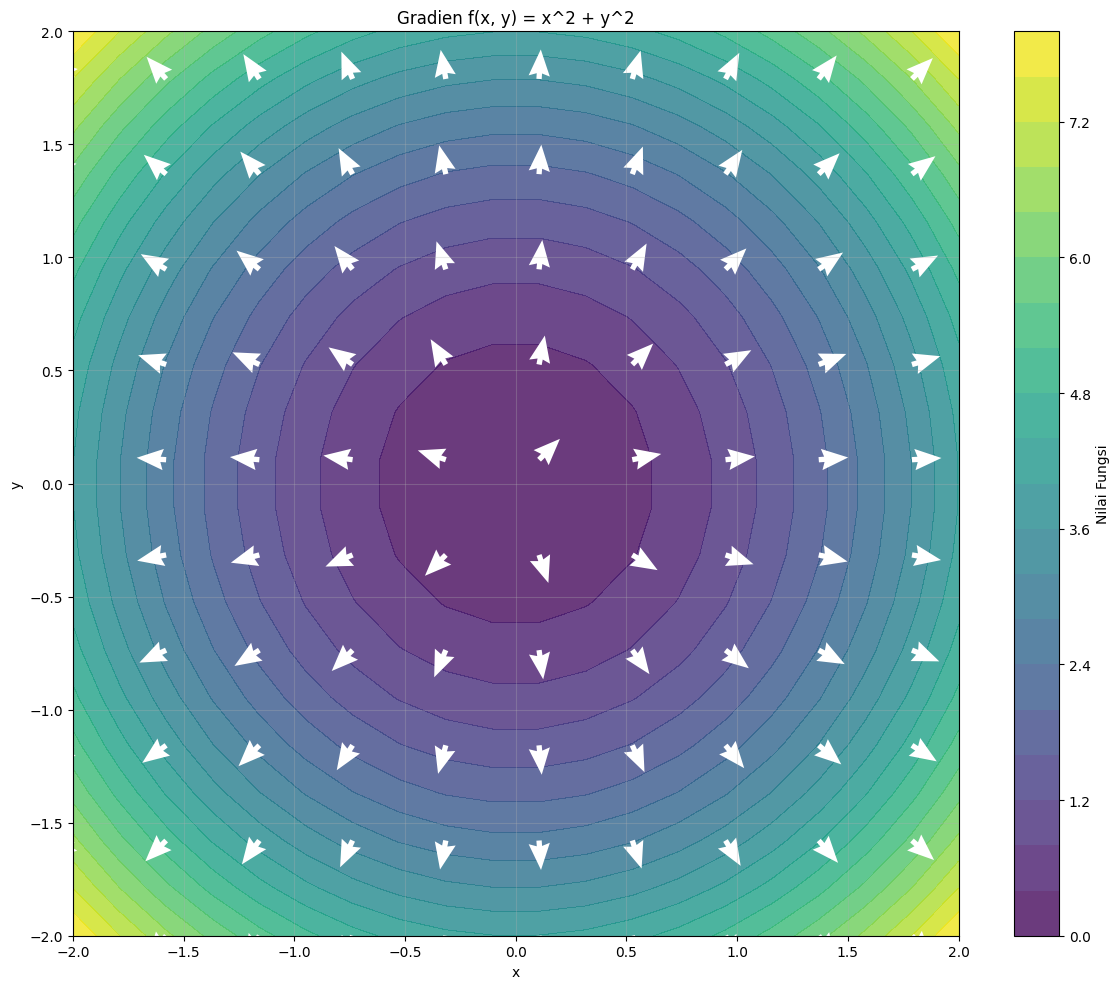

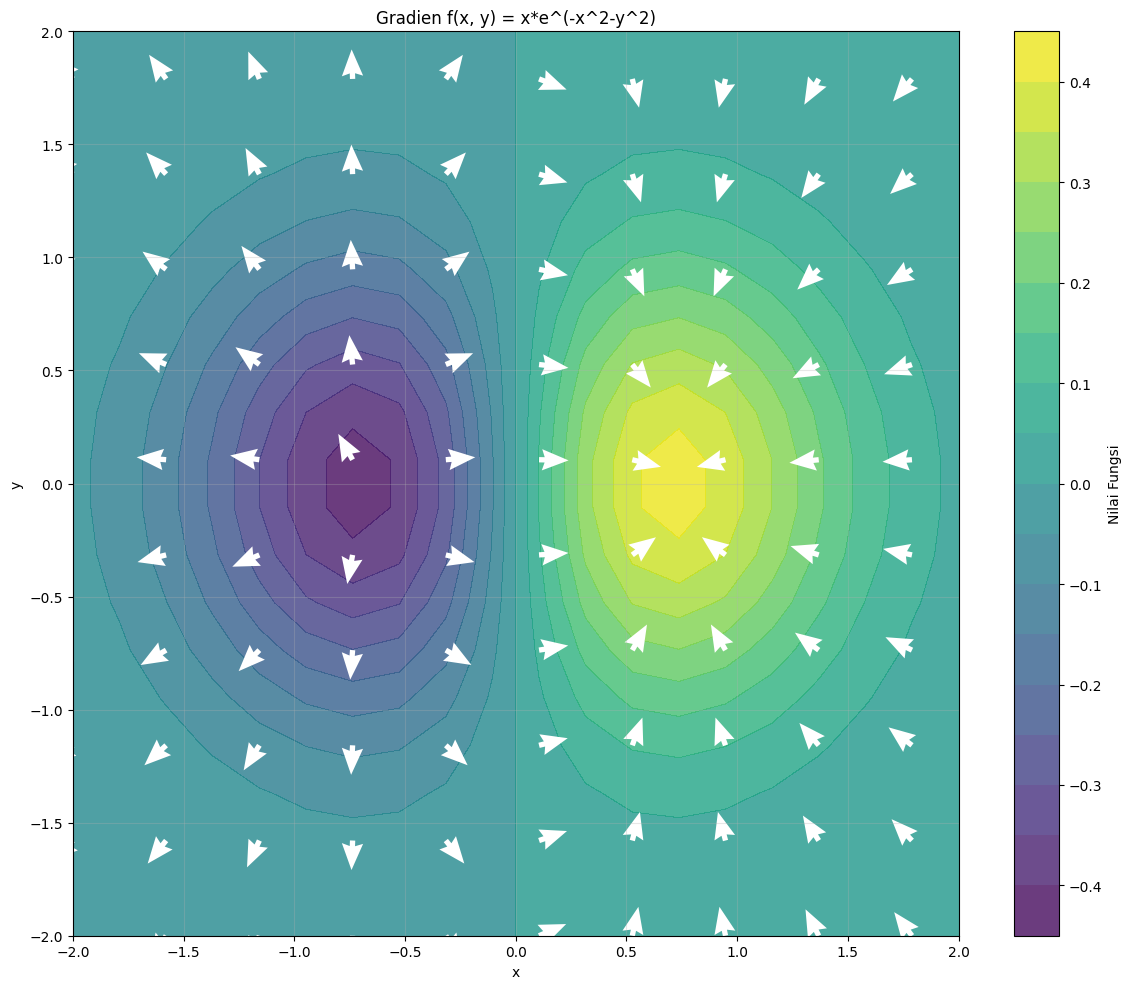

In [47]:
# Fungsi untuk menghitung turunan parsial numerik
def partial_derivative(f, x, var_index, h=1e-5):
    """
    Menghitung turunan parsial numerik dari fungsi multivariabel
    
    Parameters:
    f: fungsi yang akan diturunkan
    x: titik di mana turunan dihitung (array/list)
    var_index: indeks variabel yang diturunkan
    h: ukuran langkah (step size)
    
    Returns:
    turunan parsial numerik dari f terhadap variabel ke-var_index di titik x
    """
    x_plus_h = x.copy()
    x_plus_h[var_index] += h
    
    return (f(x_plus_h) - f(x)) / h

# Fungsi untuk menghitung gradien numerik
def numerical_gradient(f, x, h=1e-5):
    """
    Menghitung gradien numerik dari fungsi multivariabel
    
    Parameters:
    f: fungsi yang akan diturunkan
    x: titik di mana turunan dihitung (array/list)
    h: ukuran langkah (step size)
    
    Returns:
    gradien numerik dari f di titik x
    """
    n = len(x)
    grad = np.zeros(n)
    
    for i in range(n):
        grad[i] = partial_derivative(f, x, i, h)
    
    return grad

# Contoh fungsi multivariabel
def f_multi1(x):
    """f(x, y) = x^2 + y^2"""
    return x[0]**2 + x[1]**2

def f_multi2(x):
    """f(x, y) = x*e^(-x^2-y^2)"""
    return x[0] * np.exp(-(x[0]**2 + x[1]**2))

def f_multi3(x):
    """f(x, y, z) = x^2 + y^2 - z^2"""
    return x[0]**2 + x[1]**2 - x[2]**2

# Turunan parsial analitik untuk f_multi1
def df_dx1_multi1(x):
    """∂f/∂x = 2x"""
    return 2 * x[0]

def df_dy1_multi1(x):
    """∂f/∂y = 2y"""
    return 2 * x[1]

# Turunan parsial analitik untuk f_multi2
def df_dx1_multi2(x):
    """∂f/∂x = (1-2x^2)*e^(-x^2-y^2)"""
    return (1 - 2 * x[0]**2) * np.exp(-(x[0]**2 + x[1]**2))

def df_dy1_multi2(x):
    """∂f/∂y = -2xy*e^(-x^2-y^2)"""
    return -2 * x[0] * x[1] * np.exp(-(x[0]**2 + x[1]**2))

# Verifikasi turunan parsial
def verify_partial_derivative(f, df_dx, df_dy, point, function_name):
    x, y = point
    
    # Turunan parsial numerik
    df_dx_num = partial_derivative(f, np.array([x, y]), 0)
    df_dy_num = partial_derivative(f, np.array([x, y]), 1)
    
    # Turunan parsial analitik
    df_dx_ana = df_dx(np.array([x, y]))
    df_dy_ana = df_dy(np.array([x, y]))
    
    print(f"Turunan Parsial untuk {function_name} di ({x}, {y}):")
    print(f"  ∂f/∂x (numerik): {df_dx_num:.10f}")
    print(f"  ∂f/∂x (analitik): {df_dx_ana:.10f}")
    print(f"  Error: {abs(df_dx_num - df_dx_ana):.10f}")
    print()
    print(f"  ∂f/∂y (numerik): {df_dy_num:.10f}")
    print(f"  ∂f/∂y (analitik): {df_dy_ana:.10f}")
    print(f"  Error: {abs(df_dy_num - df_dy_ana):.10f}")
    print()

# Verifikasi gradien
def verify_gradient(f, grad_f, point, function_name):
    # Gradien numerik
    grad_num = numerical_gradient(f, np.array(point))
    
    # Gradien analitik (jika tersedia)
    if grad_f is not None:
        grad_ana = grad_f(np.array(point))
        
        print(f"Gradien untuk {function_name} di {point}:")
        print(f"  ∇f (numerik): {grad_num}")
        print(f"  ∇f (analitik): {grad_ana}")
        
        # Hitung error
        error = np.linalg.norm(grad_num - grad_ana)
        print(f"  Error (Euclidean): {error:.10f}")
    else:
        print(f"Gradien numerik untuk {function_name} di {point}:")
        print(f"  ∇f: {grad_num}")
    print()

# Verifikasi turunan parsial untuk f_multi1
verify_partial_derivative(f_multi1, df_dx1_multi1, df_dy1_multi1, (2, 3), "f(x, y) = x^2 + y^2")

# Verifikasi turunan parsial untuk f_multi2
verify_partial_derivative(f_multi2, df_dx1_multi2, df_dy1_multi2, (1, 0.5), "f(x, y) = x*e^(-x^2-y^2)")

# Verifikasi gradien untuk f_multi1
def grad_f_multi1(x):
    return np.array([2*x[0], 2*x[1]])

verify_gradient(f_multi1, grad_f_multi1, (2, 3), "f(x, y) = x^2 + y^2")

# Verifikasi gradien untuk f_multi2
def grad_f_multi2(x):
    exp_term = np.exp(-(x[0]**2 + x[1]**2))
    return np.array([
        (1 - 2 * x[0]**2) * exp_term,
        -2 * x[0] * x[1] * exp_term
    ])

verify_gradient(f_multi2, grad_f_multi2, (1, 0.5), "f(x, y) = x*e^(-x^2-y^2)")

# Verifikasi gradien untuk f_multi3
def grad_f_multi3(x):
    return np.array([2*x[0], 2*x[1], -2*x[2]])

verify_gradient(f_multi3, grad_f_multi3, (1, 2, 3), "f(x, y, z) = x^2 + y^2 - z^2")

# Visualisasi gradien untuk fungsi 2D
def visualize_gradient_2d(f, grad_f, title, x_range=(-2, 2), y_range=(-2, 2), n_points=20):
    """Visualisasikan gradien dari fungsi 2D"""
    x = np.linspace(x_range[0], x_range[1], n_points)
    y = np.linspace(y_range[0], y_range[1], n_points)
    X, Y = np.meshgrid(x, y)
    
    # Hitung nilai fungsi
    Z = np.zeros_like(X)
    for i in range(n_points):
        for j in range(n_points):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))
    
    # Hitung gradien
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    for i in range(n_points):
        for j in range(n_points):
            grad = grad_f(np.array([X[i, j], Y[i, j]]))
            U[i, j] = grad[0]
            V[i, j] = grad[1]
    
    # Normalisasi gradien untuk visualisasi
    norm = np.sqrt(U**2 + V**2)
    # Hindari pembagian dengan nol
    norm_non_zero = np.where(norm > 1e-10, norm, 1)
    U_normalized = U / norm_non_zero
    V_normalized = V / norm_non_zero
    
    plt.figure(figsize=(12, 10))
    
    # Plot kontur fungsi
    contour = plt.contourf(X, Y, Z, 20, cmap='viridis', alpha=0.8)
    plt.colorbar(contour, label='Nilai Fungsi')
    
    # Plot gradien
    skip = 2  # Kurangi kepadatan panah
    plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
               U_normalized[::skip, ::skip], V_normalized[::skip, ::skip],
               color='white', scale=30, headwidth=4, headlength=5)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualisasi gradien untuk f_multi1
visualize_gradient_2d(f_multi1, grad_f_multi1, "Gradien f(x, y) = x^2 + y^2")

# Visualisasi gradien untuk f_multi2
visualize_gradient_2d(f_multi2, grad_f_multi2, "Gradien f(x, y) = x*e^(-x^2-y^2)", x_range=(-2, 2), y_range=(-2, 2))

## Aplikasi Turunan dalam Machine Learning

Turunan memiliki banyak aplikasi penting dalam machine learning. Berikut beberapa contoh:

### 1. Gradient Descent

Gradient Descent adalah algoritma optimasi yang digunakan untuk meminimalkan fungsi biaya (cost function) dalam model machine learning. Algoritma ini menggunakan gradien untuk menemukan arah penurunan tercepat dari fungsi biaya.

Algoritma dasarnya:
1. Mulai dengan parameter awal (θ₀)
2. Hitung gradien fungsi biaya pada parameter saat ini: ∇J(θ)
3. Perbarui parameter: θ = θ - α⋅∇J(θ), di mana α adalah learning rate
4. Ulangi langkah 2-3 hingga konvergen

### 2. Backpropagation dalam Neural Networks

Backpropagation menggunakan aturan rantai dari kalkulus untuk menghitung gradien dari fungsi biaya terhadap parameter (bobot dan bias) dalam jaringan saraf.

### 3. Optimasi Model

Optimasi model machine learning (misalnya, mencari parameter optimal dalam regresi logistik, SVM, dll.) sering menggunakan turunan untuk menemukan titik kritis fungsi biaya.

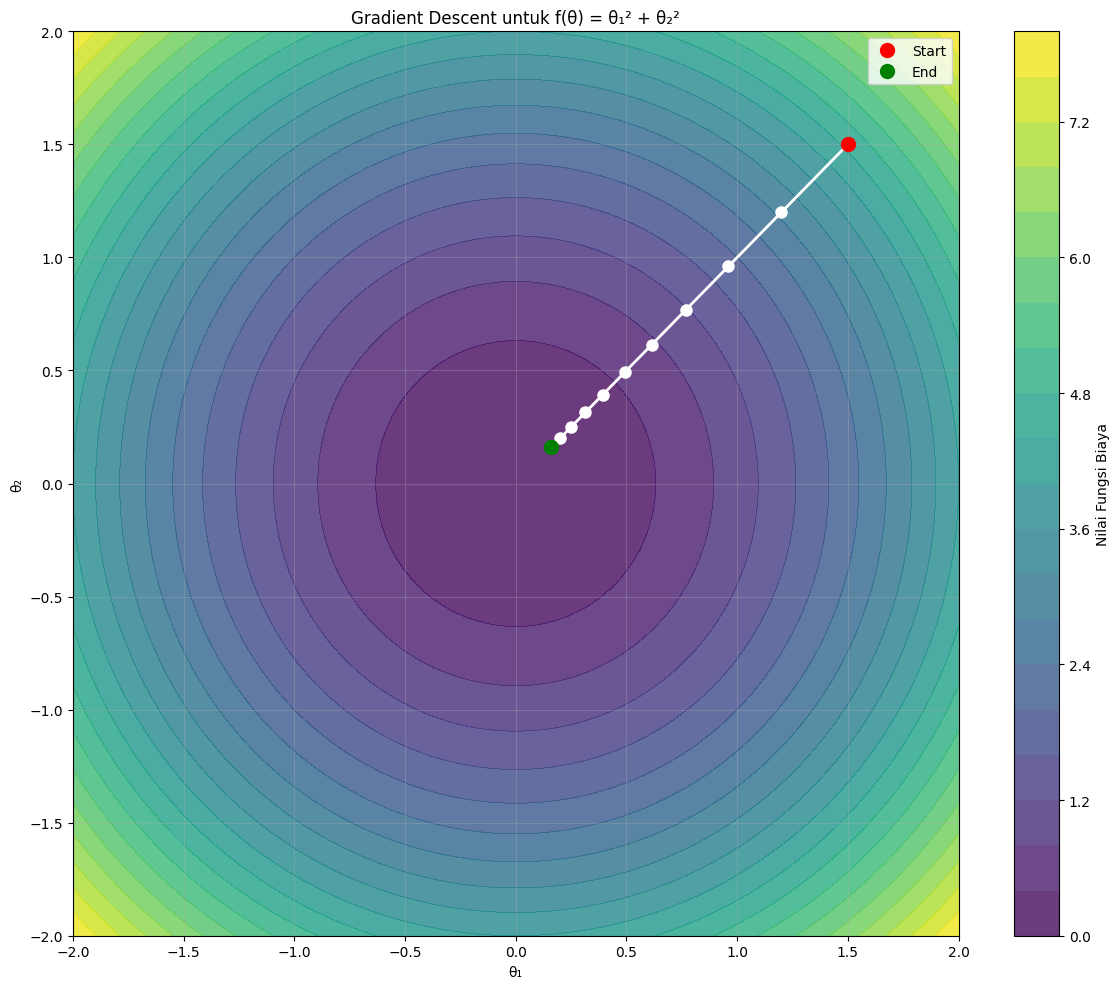

Hasil Gradient Descent untuk fungsi kuadratik:
  Parameter awal: [1.5 1.5]
  Parameter akhir: [0.16106127 0.16106127]
  Nilai fungsi biaya akhir: 0.05188146770730813



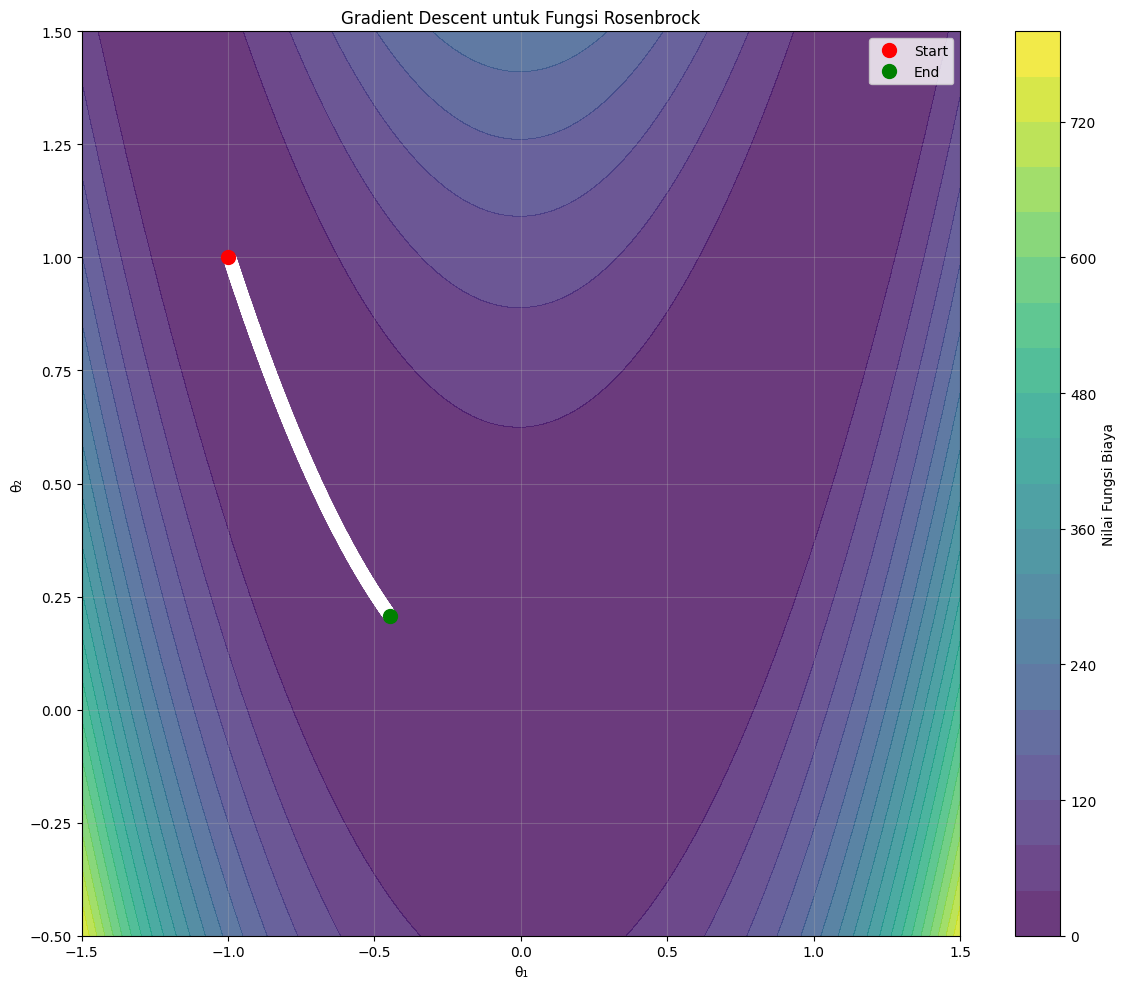

Hasil Gradient Descent untuk fungsi Rosenbrock:
  Parameter awal: [-1.  1.]
  Parameter akhir: [-0.44636818  0.20645858]
  Nilai fungsi biaya akhir: 2.0971851276168345
  Minimum sebenarnya: [1, 1] dengan nilai fungsi = 0



ValueError: operands could not be broadcast together with shapes (2,) (2,100) 

In [48]:
# Implementasi Gradient Descent

# Fungsi untuk visualisasi alur gradient descent
def visualize_gradient_descent(cost_func, grad_func, theta_init, n_iterations, learning_rate, 
                              title, x_range=(-2, 2), y_range=(-2, 2), contour_levels=20):
    """
    Visualisasikan alur gradient descent
    
    Parameters:
    cost_func: fungsi biaya
    grad_func: fungsi gradien
    theta_init: parameter awal
    n_iterations: jumlah iterasi
    learning_rate: learning rate
    title: judul plot
    x_range, y_range: rentang x dan y untuk visualisasi
    """
    # Buat grid
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    
    # Hitung nilai fungsi biaya di setiap titik
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = cost_func(np.array([X[j, i], Y[j, i]]))
    
    # Jalankan gradient descent
    theta_history = [theta_init]
    theta = theta_init.copy()
    
    for _ in range(n_iterations):
        gradient = grad_func(theta)
        theta = theta - learning_rate * gradient
        theta_history.append(theta.copy())
    
    # Plot
    plt.figure(figsize=(12, 10))
    
    # Plot kontur fungsi biaya
    contour = plt.contourf(X, Y, Z, contour_levels, cmap='viridis', alpha=0.8)
    plt.colorbar(contour, label='Nilai Fungsi Biaya')
    
    # Plot alur gradient descent
    theta_history = np.array(theta_history)
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'w-o', linewidth=2, markersize=8)
    plt.plot(theta_history[0, 0], theta_history[0, 1], 'ro', markersize=10, label='Start')
    plt.plot(theta_history[-1, 0], theta_history[-1, 1], 'go', markersize=10, label='End')
    
    plt.xlabel('θ₁')
    plt.ylabel('θ₂')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return theta_history

# 1. Gradient Descent untuk fungsi kuadratik
def quadratic_cost(theta):
    """f(θ) = θ₁² + θ₂²"""
    return theta[0]**2 + theta[1]**2

def quadratic_gradient(theta):
    """∇f(θ) = [2θ₁, 2θ₂]"""
    return np.array([2*theta[0], 2*theta[1]])

# Jalankan gradient descent untuk fungsi kuadratik
theta_init = np.array([1.5, 1.5])
n_iterations = 10
learning_rate = 0.1

theta_history_quad = visualize_gradient_descent(
    quadratic_cost, quadratic_gradient, theta_init, n_iterations, learning_rate,
    "Gradient Descent untuk f(θ) = θ₁² + θ₂²"
)

# Print hasil akhir
print("Hasil Gradient Descent untuk fungsi kuadratik:")
print(f"  Parameter awal: {theta_init}")
print(f"  Parameter akhir: {theta_history_quad[-1]}")
print(f"  Nilai fungsi biaya akhir: {quadratic_cost(theta_history_quad[-1])}")
print()

# 2. Gradient Descent untuk fungsi Rosenbrock
def rosenbrock_cost(theta):
    """Fungsi Rosenbrock: f(θ) = 100(θ₂ - θ₁²)² + (1 - θ₁)²"""
    return 100 * (theta[1] - theta[0]**2)**2 + (1 - theta[0])**2

def rosenbrock_gradient(theta):
    """Gradien fungsi Rosenbrock:
    ∂f/∂θ₁ = -400θ₁(θ₂ - θ₁²) - 2(1 - θ₁)
    ∂f/∂θ₂ = 200(θ₂ - θ₁²)
    """
    return np.array([
        -400 * theta[0] * (theta[1] - theta[0]**2) - 2 * (1 - theta[0]),
        200 * (theta[1] - theta[0]**2)
    ])

# Jalankan gradient descent untuk fungsi Rosenbrock
theta_init_rosen = np.array([-1.0, 1.0])
n_iterations_rosen = 5000
learning_rate_rosen = 0.0001

theta_history_rosen = visualize_gradient_descent(
    rosenbrock_cost, rosenbrock_gradient, theta_init_rosen, n_iterations_rosen, learning_rate_rosen,
    "Gradient Descent untuk Fungsi Rosenbrock",
    x_range=(-1.5, 1.5), y_range=(-0.5, 1.5)
)

# Print hasil akhir
print("Hasil Gradient Descent untuk fungsi Rosenbrock:")
print(f"  Parameter awal: {theta_init_rosen}")
print(f"  Parameter akhir: {theta_history_rosen[-1]}")
print(f"  Nilai fungsi biaya akhir: {rosenbrock_cost(theta_history_rosen[-1])}")
print(f"  Minimum sebenarnya: [1, 1] dengan nilai fungsi = 0")
print()

# 3. Regresi Linear dengan Gradient Descent
# Buat data sintetis
np.random.seed(42)
X_data = 2 * np.random.rand(100, 1)
y_data = 4 + 3 * X_data + np.random.randn(100, 1)

# Tambahkan kolom bias
X_b = np.c_[np.ones((100, 1)), X_data]

def linear_cost(theta):
    """Mean Squared Error untuk regresi linear"""
    predictions = X_b @ theta
    return np.mean((predictions - y_data)**2) / 2

def linear_gradient(theta):
    """Gradien MSE untuk regresi linear"""
    predictions = X_b @ theta
    error = predictions - y_data
    return X_b.T @ error / len(X_data)

# Jalankan gradient descent untuk regresi linear
theta_init_linear = np.array([0, 0])
n_iterations_linear = 100
learning_rate_linear = 0.1

theta_history_linear = []
theta_linear = theta_init_linear.copy()
cost_history = []

for i in range(n_iterations_linear):
    gradient = linear_gradient(theta_linear)
    theta_linear = theta_linear - learning_rate_linear * gradient
    theta_history_linear.append(theta_linear.copy())
    cost_history.append(linear_cost(theta_linear))

theta_history_linear = np.array(theta_history_linear)

# Plot hasil regresi linear
plt.figure(figsize=(14, 6))

# Plot data dan garis regresi
plt.subplot(121)
plt.scatter(X_data, y_data)
plt.plot(X_data, X_b @ theta_history_linear[-1], 'r-', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi Linear dengan Gradient Descent')
plt.grid(True, alpha=0.3)

# Plot fungsi biaya vs iterasi
plt.subplot(122)
plt.plot(range(n_iterations_linear), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterasi')
plt.ylabel('MSE')
plt.title('Fungsi Biaya vs Iterasi')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print hasil akhir
print("Hasil Gradient Descent untuk regresi linear:")
print(f"  Parameter awal: {theta_init_linear}")
print(f"  Parameter akhir: θ₀ = {theta_history_linear[-1][0]:.4f}, θ₁ = {theta_history_linear[-1][1]:.4f}")
print(f"  Model regresi: y = {theta_history_linear[-1][0]:.4f} + {theta_history_linear[-1][1]:.4f}x")
print(f"  Nilai fungsi biaya akhir: {cost_history[-1]}")

# Perbandingan dengan solusi closed-form
theta_normal_eq = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_data
print(f"  Solusi dengan persamaan normal: θ₀ = {theta_normal_eq[0][0]:.4f}, θ₁ = {theta_normal_eq[1][0]:.4f}")
print(f"  Model regresi (closed-form): y = {theta_normal_eq[0][0]:.4f} + {theta_normal_eq[1][0]:.4f}x")

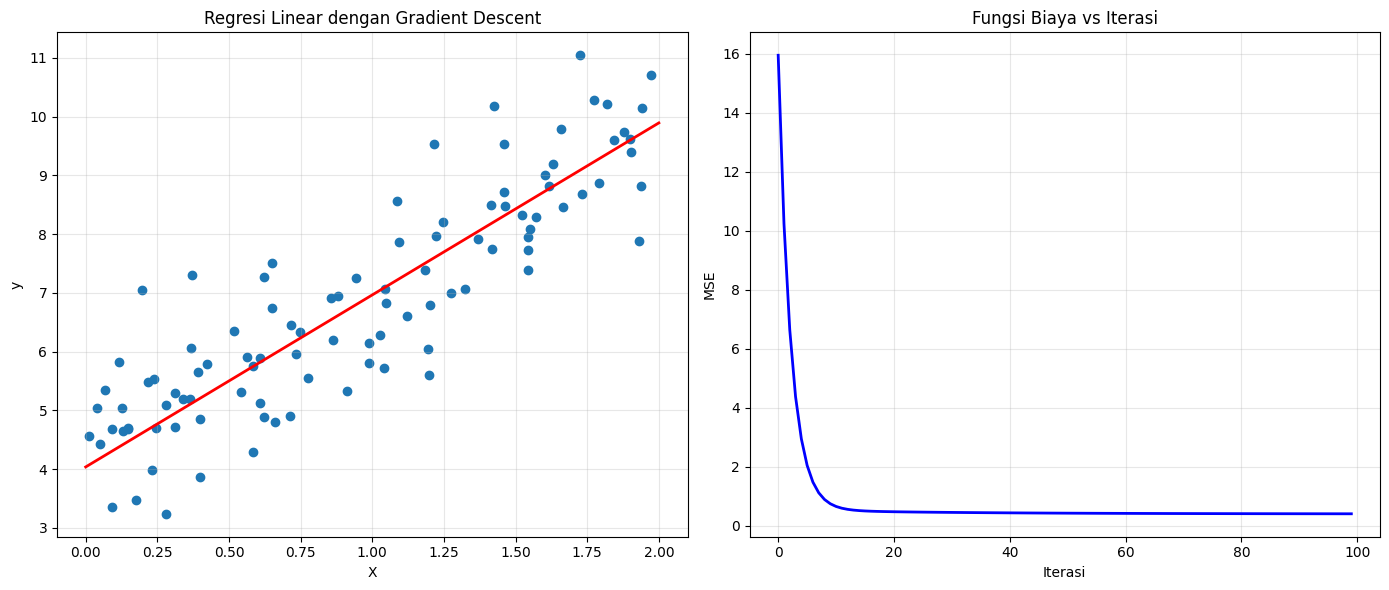

Hasil Gradient Descent untuk regresi linear:
  Parameter awal: [0 0]
  Parameter akhir: θ₀ = 4.0356, θ₁ = 2.9286
  Model regresi: y = 4.0356 + 2.9286x
  Nilai fungsi biaya akhir: 0.40815839872571863
  Solusi dengan persamaan normal: θ₀ = 4.2151, θ₁ = 2.7701
  Model regresi (closed-form): y = 4.2151 + 2.7701x


In [49]:
# Perbaikan implementasi regresi linear dengan Gradient Descent
# Buat data sintetis
np.random.seed(42)
X_data = 2 * np.random.rand(100, 1)
y_data = 4 + 3 * X_data + np.random.randn(100, 1)

# Tambahkan kolom bias
X_b = np.c_[np.ones((100, 1)), X_data]

def linear_cost(theta):
    """Mean Squared Error untuk regresi linear"""
    predictions = X_b @ theta.reshape(-1, 1)
    return np.mean((predictions - y_data)**2) / 2

def linear_gradient(theta):
    """Gradien MSE untuk regresi linear"""
    theta = theta.reshape(-1, 1)
    predictions = X_b @ theta
    error = predictions - y_data
    return (X_b.T @ error / len(X_data)).flatten()

# Jalankan gradient descent untuk regresi linear
theta_init_linear = np.array([0, 0])
n_iterations_linear = 100
learning_rate_linear = 0.1

theta_history_linear = []
theta_linear = theta_init_linear.copy()
cost_history = []

for i in range(n_iterations_linear):
    gradient = linear_gradient(theta_linear)
    theta_linear = theta_linear - learning_rate_linear * gradient
    theta_history_linear.append(theta_linear.copy())
    cost_history.append(linear_cost(theta_linear))

theta_history_linear = np.array(theta_history_linear)

# Plot hasil regresi linear
plt.figure(figsize=(14, 6))

# Plot data dan garis regresi
plt.subplot(121)
plt.scatter(X_data, y_data)
x_range = np.array([0, 2]).reshape(-1, 1)
x_range_b = np.c_[np.ones(2), x_range]
y_pred = x_range_b @ theta_history_linear[-1].reshape(-1, 1)
plt.plot(x_range, y_pred, 'r-', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi Linear dengan Gradient Descent')
plt.grid(True, alpha=0.3)

# Plot fungsi biaya vs iterasi
plt.subplot(122)
plt.plot(range(n_iterations_linear), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterasi')
plt.ylabel('MSE')
plt.title('Fungsi Biaya vs Iterasi')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print hasil akhir
print("Hasil Gradient Descent untuk regresi linear:")
print(f"  Parameter awal: {theta_init_linear}")
print(f"  Parameter akhir: θ₀ = {theta_history_linear[-1][0]:.4f}, θ₁ = {theta_history_linear[-1][1]:.4f}")
print(f"  Model regresi: y = {theta_history_linear[-1][0]:.4f} + {theta_history_linear[-1][1]:.4f}x")
print(f"  Nilai fungsi biaya akhir: {cost_history[-1]}")

# Perbandingan dengan solusi closed-form
theta_normal_eq = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_data
print(f"  Solusi dengan persamaan normal: θ₀ = {theta_normal_eq[0][0]:.4f}, θ₁ = {theta_normal_eq[1][0]:.4f}")
print(f"  Model regresi (closed-form): y = {theta_normal_eq[0][0]:.4f} + {theta_normal_eq[1][0]:.4f}x")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari konsep dasar turunan dan aplikasinya dalam konteks machine learning:

1. **Definisi Turunan**: Turunan mengukur laju perubahan fungsi terhadap perubahan input. Secara geometris, turunan adalah kemiringan garis singgung pada kurva fungsi.

2. **Aturan-aturan Diferensiasi**: Kita telah mempelajari berbagai aturan diferensiasi dasar, termasuk aturan penjumlahan, perkalian, pembagian, dan aturan rantai.

3. **Turunan Parsial dan Gradien**: Untuk fungsi multivariabel, turunan parsial mengukur laju perubahan fungsi terhadap perubahan dalam satu variabel input saja. Gradien adalah vektor yang berisi semua turunan parsial dan menunjukkan arah peningkatan terbesar dari fungsi.

4. **Aplikasi dalam Machine Learning**: Turunan memiliki banyak aplikasi dalam machine learning, terutama dalam algoritma optimasi seperti Gradient Descent yang digunakan untuk melatih model.

Pemahaman konsep turunan sangat penting dalam machine learning karena banyak algoritma pembelajaran didasarkan pada optimasi fungsi biaya menggunakan informasi dari turunan.

## Latihan

1. Hitung turunan parsial dari fungsi f(x, y, z) = x²y + y²z + z²x secara manual dan verifikasi dengan implementasi numerik.

2. Implementasikan algoritma gradient descent untuk regresi polinomial dengan polinomial derajat 2.

3. Cari titik stasioner (titik di mana gradien = 0) dari fungsi f(x, y) = x² + 2y² - 4x - 6y + 10 secara analitik dan verifikasi dengan gradient descent.

4. Implementasikan mini-batch gradient descent untuk regresi linear dan bandingkan performa dengan batch gradient descent biasa.

Solusi analitik titik stasioner:
  x = 2, y = 1.5
  f(2, 1.5) = 1.5
  Gradien di titik stasioner: [0. 0.]

Solusi dengan gradient descent:
  Titik awal: [0 0]
  Titik akhir: x = 1.9975, y = 1.5000
  Error: |x - x*| = 0.0025, |y - y*| = 0.0000
  f(1.9975, 1.5000) = 1.5000
  Gradien di titik akhir: [-4.95176016e-03 -1.32644352e-06]



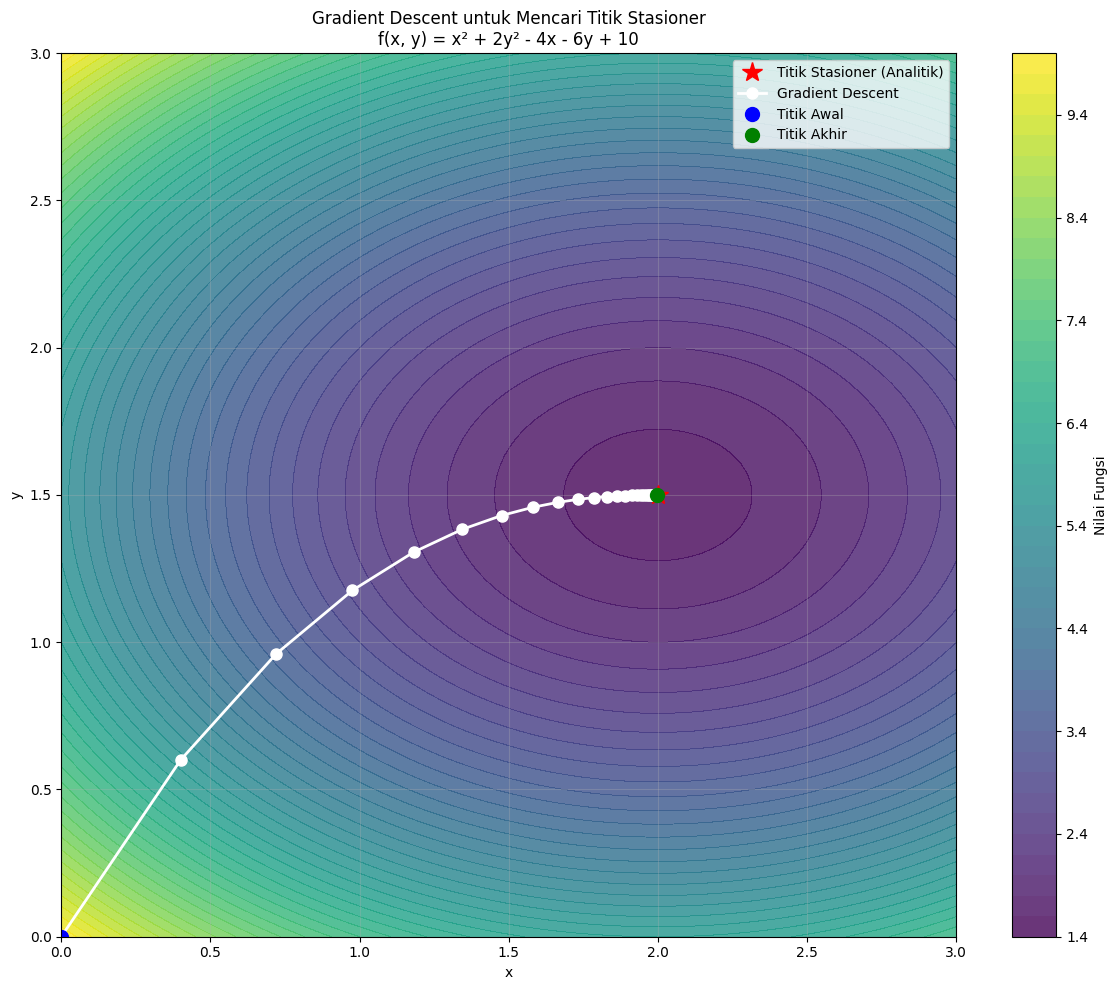

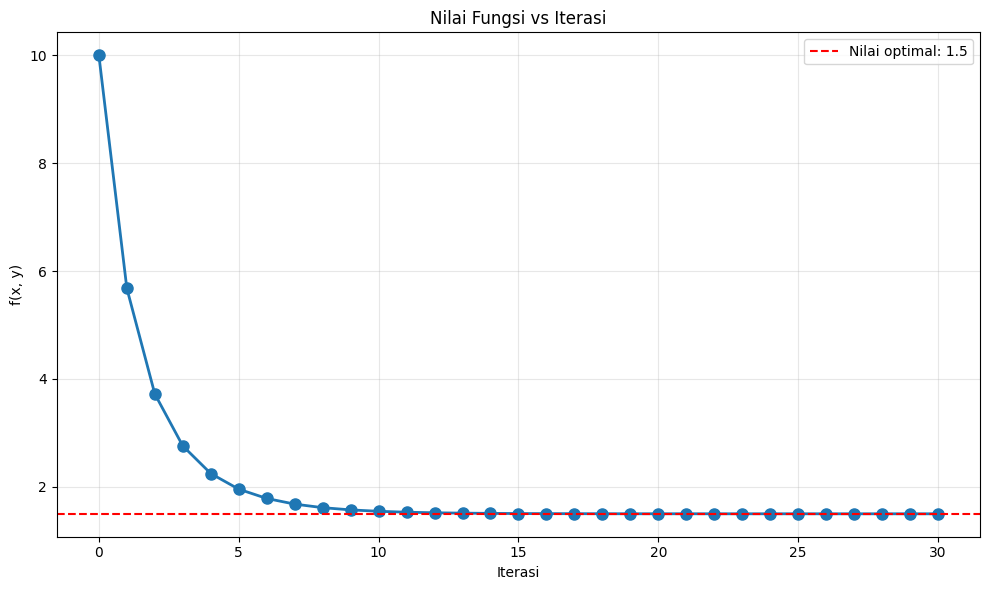

In [50]:
# Latihan: Mencari titik stasioner dari fungsi f(x, y) = x² + 2y² - 4x - 6y + 10

# Definisikan fungsi dan gradiennya
def f(point):
    x, y = point
    return x**2 + 2*y**2 - 4*x - 6*y + 10

def grad_f(point):
    x, y = point
    df_dx = 2*x - 4
    df_dy = 4*y - 6
    return np.array([df_dx, df_dy])

# Solusi analitik
# Titik stasioner: ∇f(x, y) = 0
# df/dx = 2x - 4 = 0 => x = 2
# df/dy = 4y - 6 = 0 => y = 1.5
x_stationary = 2
y_stationary = 1.5
stationary_point = np.array([x_stationary, y_stationary])
stationary_value = f(stationary_point)

print("Solusi analitik titik stasioner:")
print(f"  x = {x_stationary}, y = {y_stationary}")
print(f"  f({x_stationary}, {y_stationary}) = {stationary_value}")
print(f"  Gradien di titik stasioner: {grad_f(stationary_point)}")
print()

# Solusi dengan gradient descent
x0 = np.array([0, 0])  # Titik awal
learning_rate = 0.1
n_iterations = 30

# Jalankan gradient descent
x = x0.copy()
x_history = [x0]
f_history = [f(x0)]

for i in range(n_iterations):
    gradient = grad_f(x)
    x = x - learning_rate * gradient
    x_history.append(x.copy())
    f_history.append(f(x))

# Hitung error final
final_point = x_history[-1]
error_x = abs(final_point[0] - x_stationary)
error_y = abs(final_point[1] - y_stationary)

print("Solusi dengan gradient descent:")
print(f"  Titik awal: {x0}")
print(f"  Titik akhir: x = {final_point[0]:.4f}, y = {final_point[1]:.4f}")
print(f"  Error: |x - x*| = {error_x:.4f}, |y - y*| = {error_y:.4f}")
print(f"  f({final_point[0]:.4f}, {final_point[1]:.4f}) = {f(final_point):.4f}")
print(f"  Gradien di titik akhir: {grad_f(final_point)}")
print()

# Visualisasi fungsi dan alur gradient descent
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = f(np.array([X[j, i], Y[j, i]]))

plt.figure(figsize=(12, 10))

# Plot kontur dan titik stasioner
contour = plt.contourf(X, Y, Z, 50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Nilai Fungsi')
plt.plot(x_stationary, y_stationary, 'r*', markersize=15, label='Titik Stasioner (Analitik)')

# Plot alur gradient descent
x_history = np.array(x_history)
plt.plot(x_history[:, 0], x_history[:, 1], 'w-o', linewidth=2, markersize=8, label='Gradient Descent')
plt.plot(x_history[0, 0], x_history[0, 1], 'bo', markersize=10, label='Titik Awal')
plt.plot(x_history[-1, 0], x_history[-1, 1], 'go', markersize=10, label='Titik Akhir')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent untuk Mencari Titik Stasioner\nf(x, y) = x² + 2y² - 4x - 6y + 10')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot nilai fungsi vs iterasi
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations + 1), f_history, 'o-', linewidth=2, markersize=8)
plt.axhline(y=stationary_value, color='r', linestyle='--', label=f'Nilai optimal: {stationary_value}')
plt.xlabel('Iterasi')
plt.ylabel('f(x, y)')
plt.title('Nilai Fungsi vs Iterasi')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()